### Machine Learning Analysis on Thyroid Data


In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
thyroid_data = pd.read_csv('datasets/thyroid_data.csv')
print(thyroid_data.columns)

Index(['T3_resin', 'Serum_thyroxin', 'Serum_triiodothyronine', 'Basal_TSH',
       'Abs_diff_TSH', 'Outcome'],
      dtype='object')


In [3]:
thyroid_data.shape

(215, 6)

In [12]:
thyroid_data.head()
thyroid_data.sort_values(by='Abs_diff_TSH', ascending=True).head(10)

,T3_resin,Serum_thyroxin,Serum_triiodothyronine,Basal_TSH,Abs_diff_TSH,Outcome
121,98,10.4,1.6,2.3,-0.7,1
171,84,21.5,2.7,1.1,-0.6,2
158,67,23.3,7.4,1.8,-0.6,2
174,94,20.5,1.8,1.4,-0.5,2
88,105,8.1,2.0,1.9,-0.5,1
96,114,11.1,2.4,2.0,-0.3,1
172,84,18.5,4.4,1.1,-0.3,2
83,98,9.1,1.4,1.9,-0.3,1
159,95,11.1,2.7,1.6,-0.3,2
50,100,11.3,2.5,0.7,-0.3,1


In [13]:
thyroid_data.groupby('Outcome').size()

Outcome
1    150
2     35
3     30
dtype: int64

array([[<AxesSubplot:title={'center':'T3_resin'}>,
        <AxesSubplot:title={'center':'Serum_thyroxin'}>],
       [<AxesSubplot:title={'center':'Serum_triiodothyronine'}>,
        <AxesSubplot:title={'center':'Basal_TSH'}>],
       [<AxesSubplot:title={'center':'Abs_diff_TSH'}>,
        <AxesSubplot:title={'center':'Outcome'}>]], dtype=object)

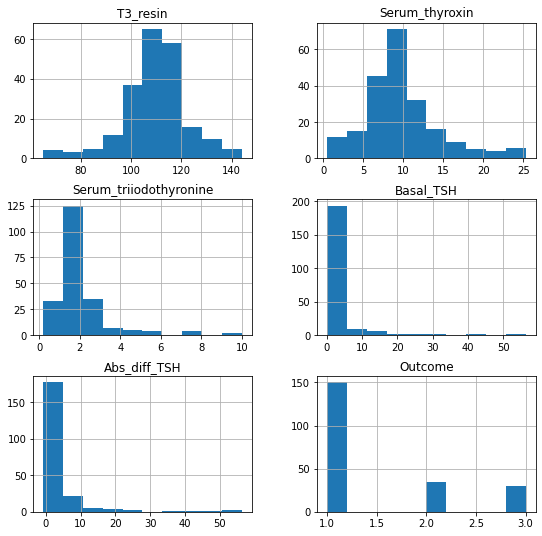

In [14]:
thyroid_data.hist(figsize=(9, 9))

In [15]:
thyroid_data.isnull().sum()

T3_resin                  0
Serum_thyroxin            0
Serum_triiodothyronine    0
Basal_TSH                 0
Abs_diff_TSH              0
Outcome                   0
dtype: int64

In [16]:
thyroid_data.isna().sum()

T3_resin                  0
Serum_thyroxin            0
Serum_triiodothyronine    0
Basal_TSH                 0
Abs_diff_TSH              0
Outcome                   0
dtype: int64

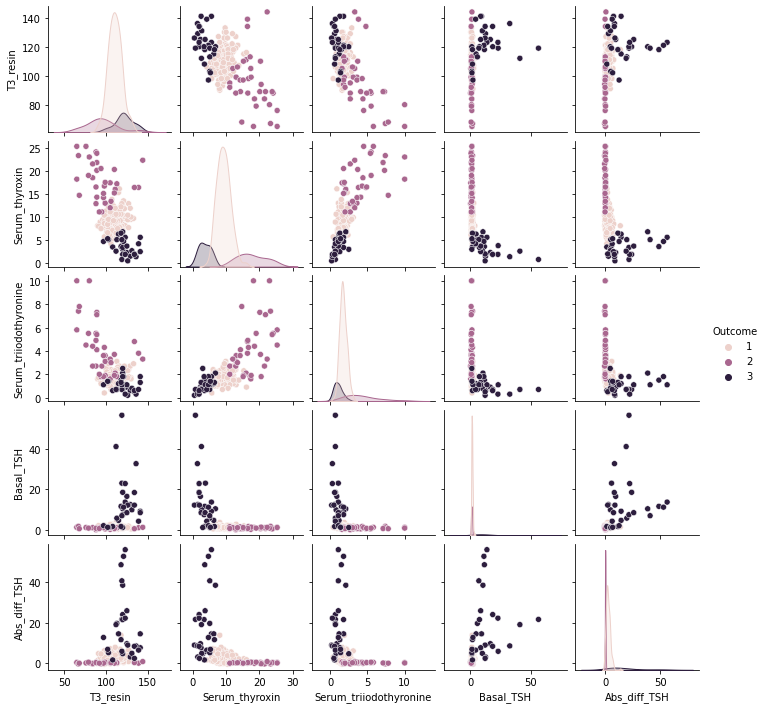

In [29]:
# Features/Response
feature_names = ['T3_resin', 'Serum_thyroxin', 'Serum_triiodothyronine', 'Basal_TSH', 'Abs_diff_TSH']
X = thyroid_data[feature_names]
y = thyroid_data.Outcome
sns.pairplot(data=thyroid_data, hue="Outcome", height=2)

In [34]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV

from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC


In [43]:
# Initial model selection process
models = []
knn = KNeighborsClassifier()
tree = DecisionTreeClassifier()
models.append(('KNN', knn))
models.append(('DT', tree))
models.append(('GNB', GaussianNB()))
models.append(("BNB", BernoulliNB()))
models.append(('SVM',SVC()))

from sklearn.preprocessing import StandardScaler

# Train/Test split
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = thyroid_data.Outcome, random_state=0)

#scaler = StandardScaler()
#X_train = scaler.fit_transform(X_train)
#X_test = scaler.transform(X_test)


names = []
scores = []

for name, model in models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    scores.append(accuracy_score(y_test, y_pred))
    names.append(name)

tr_split = pd.DataFrame({'Name': names, 'Score': scores})
print(tr_split)

knn_params = {'n_neighbors': [1, 2, 3, 5, 10, 20, 25, 30, 40, 50, 64]}

knn_grid = GridSearchCV(knn, knn_params, 
                         cv=5, n_jobs=-1, verbose=True)

knn_grid.fit(X_train, y_train)
print (f"Best knn parameters are {knn_grid.best_params_}") 

tree_params = {'max_depth': [1, 2, 3, 5, 10, 20, 25, 30, 40, 50, 64],
               'max_features': [1, 2, 3, 5, 10, 20 ,30, 50, 64]}

tree_grid = GridSearchCV(tree, tree_params, 
                         cv=5, n_jobs=-1, verbose=True)

tree_grid.fit(X_train, y_train)
print (f"Best tree parameters are {tree_grid.best_params_}") 

  Name     Score
0  KNN  0.944444
1   DT  0.888889
2  GNB  0.944444
3  BNB  0.796296
4  SVM  0.833333
Fitting 5 folds for each of 11 candidates, totalling 55 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    1.0s
[Parallel(n_jobs=-1)]: Done  55 out of  55 | elapsed:    1.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:    0.1s


Best knn parameters are {'n_neighbors': 1}
Fitting 5 folds for each of 99 candidates, totalling 495 fits
Best tree parameters are {'max_depth': 50, 'max_features': 2}


[Parallel(n_jobs=-1)]: Done 440 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done 495 out of 495 | elapsed:    0.5s finished


In [44]:
strat_k_fold = StratifiedKFold(n_splits=10, random_state=10)

names = []
scores = []

for name, model in models:
    
    score = cross_val_score(model, X, y, cv=strat_k_fold, scoring='accuracy').mean()
    names.append(name)
    scores.append(score)

kf_cross_val = pd.DataFrame({'Name': names, 'Score': scores})
print(kf_cross_val)

/home/sean/.local/lib/python3.8/site-packages/sklearn/model_selection/_split.py:293: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  warnings.warn(


  Name     Score
0  KNN  0.925758
1   DT  0.939394
2  GNB  0.967749
3  BNB  0.734848
4  SVM  0.836797


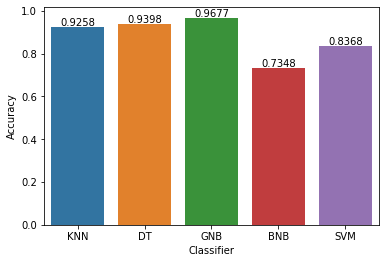

In [25]:
axis = sns.barplot(x = 'Name', y = 'Score', data = kf_cross_val)
axis.set(xlabel='Classifier', ylabel='Accuracy')

for p in axis.patches:
    height = p.get_height()
    axis.text(p.get_x() + p.get_width()/2, height + 0.005, '{:1.4f}'.format(height), ha="center") 
    
plt.show()